In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Import the Fitness Club data

In [2]:
data = pd.read_excel ('Fitness Club Data.xlsx')

data.head(10)

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0
5,19970104,1248.00,150.00,12.0,1,0,0,1,0
6,19970105,249.00,249.00,8.0,1,0,0,2,0
7,19970105,909.79,350.00,13.0,5,1,0,2,0
8,19970106,1677.00,125.00,10.0,1,0,0,2,1
9,19970106,1844.00,1844.00,9.0,1,7,0,1,0


### Modify the data: change "enrolldt" to datetime 

In [3]:
data['enrolldt'] = pd.to_datetime(data['enrolldt'], format='%Y%m%d')
print (data.dtypes)

enrolldt    datetime64[ns]
price              float64
downpmt            float64
monthdue           float64
pmttype              int64
use                  int64
age                  int64
gender               int64
default              int64
dtype: object


### 1. Calculate basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field 

In [4]:
data.describe()

,price,downpmt,monthdue,pmttype,use,age,gender,default
count,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1003.658899,199.824535,8.287290,3.093225,1.944371,29.203317,1.498007,0.115042
std,439.224768,335.437237,7.108381,1.560034,2.315550,13.277721,0.500006,0.319080
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,699.000000,49.000000,5.500000,1.000000,0.000000,22.000000,1.000000,0.000000
50%,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1249.000000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,9371.250000,9371.250000,120.000000,5.000000,8.000000,99.000000,2.000000,1.000000


In [5]:
# calculate categorical means -- pmttype
data.groupby('pmttype').describe()

price                                                              \
          count         mean         std  min       25%      50%        75%   
pmttype                                                                       
1        7760.0   885.725160  496.465988  0.0  523.2300   879.00  1154.1325   
3        5146.0  1055.670725  416.975606  0.0  787.5300  1048.00  1294.8000   
4        6038.0  1030.787854  385.222821  0.0  764.5475   999.00  1253.5100   
5        5899.0  1085.657259  395.736541  0.0  849.0000  1068.48  1304.0000   

                 downpmt              ... gender      default            \
             max   count        mean  ...    75%  max   count      mean   
pmttype                               ...                                 
1        9371.25  7760.0  340.317137  ...    2.0  2.0  7760.0  0.239948   
3        4455.00  5146.0  149.833290  ...    2.0  2.0  5146.0  0.160902   
4        3295.17  6038.0  108.871298  ...    2.0  2.0  6038.0  0.009440   
5        3774.00  5899.0  151.716042  ...    2.0  2.0  5899.0  0.018817   

                                            
              std  min  25%  50%  75%  max  
pmttype                                     
1        0.427079  0.0  0.0  0.0  0.0  1.0  
3        0.367476  0.0  0.0  0.0  0.0  1.0  
4        0.096709  0.0  0.0  0.0  0.0  1.0  
5        0.135889  0.0  0.0  0.0  0.0  1.0  

[4 rows x 56 columns]

In [6]:
# calculate categorical means -- use
data.groupby('use').describe()

price                                                             \
      count         mean         std   min       25%      50%      75%   
use                                                                      
0    9919.0  1012.562000  457.217663   0.0  699.0000   999.00  1249.00   
1    5776.0  1036.200466  434.362380   0.0  744.0000  1024.00  1279.00   
2     618.0  1010.534191  447.039263  99.0  720.1075   999.00  1248.00   
3    2385.0   995.610323  424.950230   0.0  684.0000   999.00  1254.00   
4    1483.0   992.343965  406.977977   0.0  699.0000   998.00  1250.34   
5    1125.0   979.205938  406.105883  70.0  656.1400   979.00  1248.00   
6    2462.0   955.726300  423.181752   0.0  656.1400   966.16  1200.16   
7     792.0   913.261452  416.249437   0.0  599.0000   921.50  1149.50   
8     283.0   906.738163  396.826821   0.0  609.0000   929.00  1148.00   

             downpmt              ... gender      default                      \
         max   count        mean  ...    75%  max   count      mean       std   
use                               ...                                           
0    9371.25  9919.0  210.240363  ...    2.0  2.0  9919.0  0.210606  0.407760   
1    9000.00  5776.0  181.326389  ...    2.0  2.0  5776.0  0.107514  0.309792   
2    5724.00   618.0  181.140647  ...    2.0  2.0   618.0  0.061489  0.240419   
3    3774.00  2385.0  184.711388  ...    2.0  2.0  2385.0  0.035220  0.184374   
4    3375.84  1483.0  193.918658  ...    2.0  2.0  1483.0  0.010115  0.100095   
5    2380.42  1125.0  206.693804  ...    2.0  2.0  1125.0  0.004444  0.066548   
6    9000.00  2462.0  208.966552  ...    2.0  2.0  2462.0  0.002031  0.045029   
7    4200.00   792.0  219.389634  ...    2.0  2.0   792.0  0.001263  0.035533   
8    2285.92   283.0  249.822686  ...    2.0  2.0   283.0  0.000000  0.000000   

                              
     min  25%  50%  75%  max  
use                           
0    0.0  0.0  0.0  0.0  1.0  
1    0.0  0.0  0.0  0.0  1.0  
2    0.0  0.0  0.0  0.0  1.0  
3    0.0  0.0  0.0  0.0  1.0  
4    0.0  0.0  0.0  0.0  1.0  
5    0.0  0.0  0.0  0.0  1.0  
6    0.0  0.0  0.0  0.0  1.0  
7    0.0  0.0  0.0  0.0  1.0  
8    0.0  0.0  0.0  0.0  0.0  

[9 rows x 56 columns]

In [7]:
# calculate categorical means -- gender
data.groupby('gender').describe()

price                                                                \
          count         mean         std  min    25%    50%      75%      max   
gender                                                                          
1       12471.0   996.748019  446.263872  0.0  699.0  999.0  1248.00  9371.25   
2       12372.0  1010.625079  431.919422  0.0  699.0  999.0  1269.88  5980.00   

        downpmt              ...   age        default                      \
          count        mean  ...   75%   max    count      mean       std   
gender                       ...                                            
1       12471.0  201.781223  ...  36.0  99.0  12471.0  0.127255  0.333272   
2       12372.0  197.852190  ...  36.0  99.0  12372.0  0.102732  0.303621   

                                 
        min  25%  50%  75%  max  
gender                           
1       0.0  0.0  0.0  0.0  1.0  
2       0.0  0.0  0.0  0.0  1.0  

[2 rows x 56 columns]

### 2. Visualize distributions of data elements using histograms for key variables and predict which variables you expect to be most correlated with default/churn. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e9dcd0>,
      dtype=object)

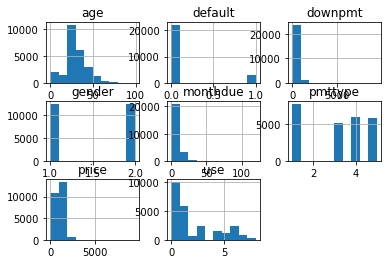

In [8]:
data.hist(column=['price','downpmt','monthdue','pmttype','use','age','gender','default'])

Text(0, 0.5, 'default')

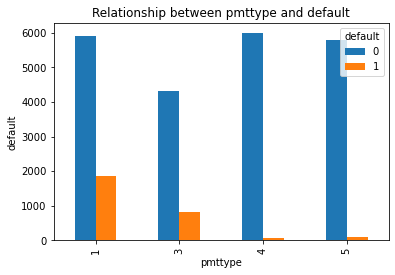

In [9]:
# pmttype with default
pd.crosstab(data.pmttype,data.default).plot(kind='bar')
plt.title('Relationship between pmttype and default')
plt.xlabel('pmttype')
plt.ylabel('default')

Text(0, 0.5, 'default')

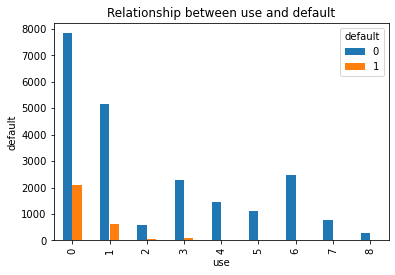

In [10]:
# use with default
pd.crosstab(data.use,data.default).plot(kind='bar')
plt.title('Relationship between use and default')
plt.xlabel('use')
plt.ylabel('default')

Text(0, 0.5, 'default')

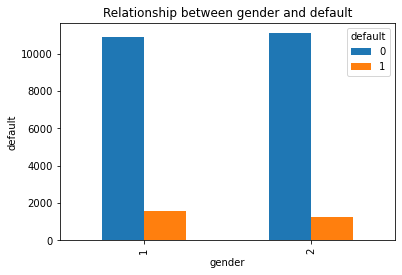

In [11]:
# gender with default
pd.crosstab(data.gender,data.default).plot(kind='bar')
plt.title('Relationship between gender and default')
plt.xlabel('gender')
plt.ylabel('default')

#### According to the graphs above, "payment type" and "use" have relatively strong relationship with "default".

### 3. Calculate Linear and/or Logistic Regression Models to Predict Churn/Retention, you may choose to identify groups within the data to narrow your focus on. (The "default" variable = churn, you may choose to only use age and payment type to build a model to predict "default" = churn) 

### and 

### 4. Display the output visually using charts of your choosing and explain your choice. (Confusion Matrix) 

In [12]:
X = data[['use','pmttype']]
y = data['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
# RandomForest
rf = RandomForestRegressor(n_estimators= 100).fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print(rf_prediction[:10])

[0.18716191 0.00784681 0.01928669 0.03999187 0.         0.02554455
 0.35979395 0.00784681 0.03999187 0.01928669]


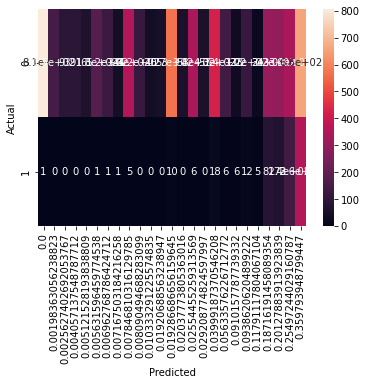

In [14]:
rf_confusion_matrix = pd.crosstab(y_test, rf_prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(rf_confusion_matrix, annot=True)

In [18]:
# logistic regression
lr = LogisticRegression().fit(X_train,y_train)
lr_prediction=lr.predict(X_test)

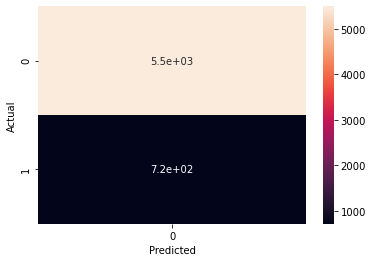

In [19]:
lr_confusion_matrix = pd.crosstab(y_test, lr_prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(lr_confusion_matrix, annot=True)

In [20]:
print('Logistic regression Accuracy: ',metrics.accuracy_score(y_test, lr_prediction))
plt.show()

Logistic regression Accuracy:  0.883915633553373


In [21]:
# Linear Regression for use and default
X1 = data[['use']]
y1 = data['default']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.25,random_state=0)
reg1 = LinearRegression().fit(X1,y1)

In [22]:
reg1.score(X1,y1)

0.05973670147300569

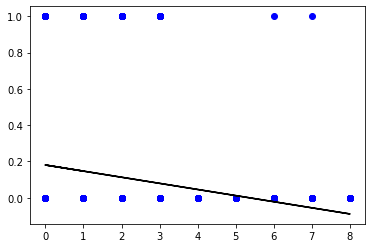

In [23]:
y_pred1 = reg1.predict(X_test1)
plt.scatter(X_test1,y_test1,color='b')
plt.plot(X_test1,y_pred1,color = 'k')
plt.show()

In [24]:
# Linear Regression for gender and default
X2 = data[['gender']]
y2 = data['default']
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.25,random_state=0)
reg2 = LinearRegression().fit(X2,y2)

In [25]:
reg2.score(X2,y2)

0.001476756138826807

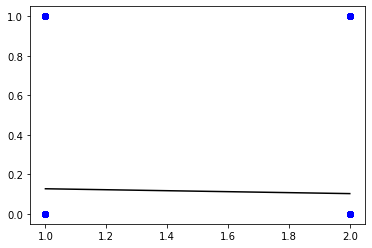

In [26]:
y_pred2 = reg2.predict(X_test2)
plt.scatter(X_test2,y_test2,color='b')
plt.plot(X_test2,y_pred2,color = 'k')
plt.show()

In [27]:
# Linear Regression for pmttype and default
X3 = data[['pmttype']]
y3 = data['default']
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.25,random_state=0)
reg3 = LinearRegression().fit(X3,y3)

In [28]:
reg3.score(X3,y3)

0.09008353619343434

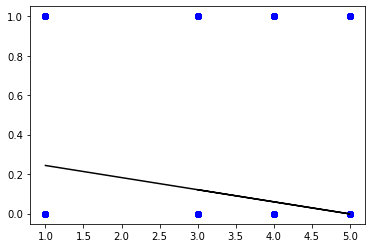

In [29]:
y_pred3 = reg3.predict(X_test3)
plt.scatter(X_test3,y_test3,color='b')
plt.plot(X_test3,y_pred3,color = 'k')
plt.show()